In [227]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2


# необходимо для корректного импорта своих модулей в JupyterLab
import sys
current_dir = sys.path[0]
project_dir = 'SF_DS_Pro'
last_position = current_dir.find(project_dir) + len(project_dir)
project_path = current_dir[:last_position]
sys.path.append(project_path)


%matplotlib inline
import matplotlib.pyplot as plt # библиотека визуализации
import seaborn as sns
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})


import warnings
warnings.filterwarnings('ignore')


from IPython.core.display import HTML
HTML("""
<style>
.p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
  padding: 0;
  border: 0;
}
</style>
""")

import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.2f}'.format)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
from pandas_profiling import ProfileReport

In [229]:
hotels = pd.read_csv('data\hotels.csv')

In [230]:
df = hotels.copy()

hotel_address — адрес отеля;\
additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.\
review_date — дата, когда рецензент разместил соответствующий отзыв;\
average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;\
hotel_name — название отеля;\
reviewer_nationality — страна рецензента;\
negative_review — отрицательный отзыв, который рецензент дал отелю;\
review_total_negative_word_counts — общее количество слов в отрицательном отзыв;\
total_number_of_reviews — общее количество действительных отзывов об отеле;\
positive_review — положительный отзыв, который рецензент дал отелю;\
review_total_positive_word_counts — общее количество слов в положительном отзыве.\
total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;\
reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;\
tags — теги, которые рецензент дал отелю;\
days_since_review — количество дней между датой проверки и датой очистки;\
lat — географическая широта отеля;\
lng — географическая долгота отеля.

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [232]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [233]:
df['lat'] = df['lat'].fillna(df['lat'].mode()[0])
df['lng'] = df['lng'].fillna(df['lng'].mode()[0])

In [234]:
def reformat_days_since_review(days_since_review):
    days_str = str(days_since_review)
    
    days = days_str.split()[0]
    
    return int(days)

In [235]:
df['days_since_review'] = df['days_since_review'].apply(reformat_days_since_review)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [237]:
df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.40,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.00,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.51,-0.14
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.30,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.30,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.52,-0.12
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.90,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.50,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289,48.85,2.33
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.50,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.00,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681,48.89,2.39
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.50,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.60,"[' Business trip ', ' Couple ', ' Standard Dou...",516,52.39,4.85


In [238]:
# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts']

# категориальные признаки
cat_cols = ['average_score', 'lat']

In [239]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)
def get_X_y_dataset(df, target_feature):
    X = df.drop([target_feature], axis = 1)  
    y = df[target_feature]

    return X, y

In [240]:
X, y = get_X_y_dataset(df, 'reviewer_score')

In [241]:
y = y.astype('int')

In [242]:
X[cat_cols]

,average_score,lat
0,8.40,51.51
1,8.30,51.52
2,8.90,48.85
3,7.50,48.89
4,8.50,52.39
...,...,...
386798,9.00,51.49
386799,8.40,48.19
386800,6.80,51.52
386801,8.10,51.52


<AxesSubplot:>

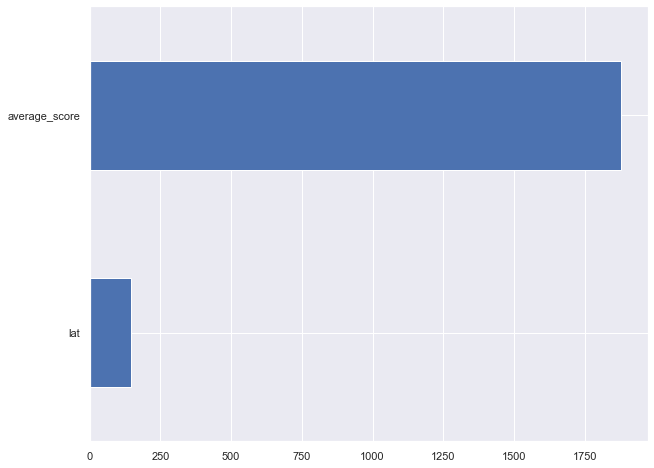

In [243]:
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<AxesSubplot:>

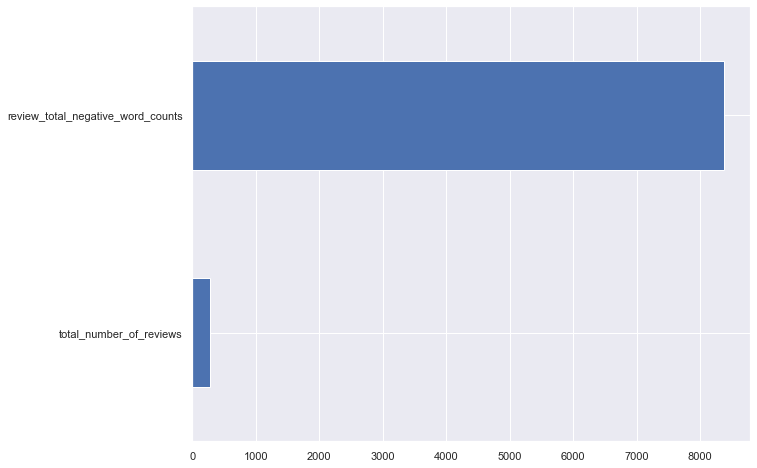

In [244]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

In [246]:
# Сколько отелей представлено в наборе данных?
df['hotel_name'].nunique()

1492

In [247]:
# Ответьте на вопросы о дате размещения отзывов
df['review_date'].describe()

count                  386803
unique                    731
top       2017-08-02 00:00:00
freq                     1911
first     2015-08-04 00:00:00
last      2017-08-03 00:00:00
Name: review_date, dtype: object

In [248]:
# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
df['review_date'].max()


Timestamp('2017-08-03 00:00:00')

In [249]:
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
df['review_date'].min()

Timestamp('2015-08-04 00:00:00')

### Сколько уникальных тегов представлено в наборе данных?

In [250]:
# Признак с тегами по всей выборке конвертирую в список
tags_from_df = df['tags'].to_list()

tags_dict = dict()

# Обрабатываю в цикле каждую строку
for tags_string in tags_from_df:
    # Теги представлены в виде
    tags_string = tags_string.replace('[', '').replace(']', '').replace('\'', '')
    tag_list = tags_string.split(',')
    if len(tag_list) > 0:
        for tag in tag_list:
            tag = tag.strip()
            if tag in tags_dict:
                tags_dict[tag] = tags_dict[tag] + 1
            else:
                tags_dict[tag] = 1

In [251]:
tags_df = pd.DataFrame({'tag': list(tags_dict.keys()), 'frequency': list(tags_dict.values())}).sort_values(by=['frequency'], ascending=False)

In [252]:
tags_df

,tag,frequency
0,Leisure trip,313593
4,Submitted from a mobile device,230778
1,Couple,189212
7,Stayed 1 night,145373
3,Stayed 2 nights,100263
...,...,...
2115,Studio with Spa Access,1
1024,Comfort Family Room,1
2112,Junior Suite Free Wifi,1
977,Design Suite,1


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386803 non-null  object        
 1   additional_number_of_scoring                386803 non-null  int64         
 2   review_date                                 386803 non-null  datetime64[ns]
 3   average_score                               386803 non-null  float64       
 4   hotel_name                                  386803 non-null  object        
 5   reviewer_nationality                        386803 non-null  object        
 6   negative_review                             386803 non-null  object        
 7   review_total_negative_word_counts           386803 non-null  int64         
 8   total_number_of_reviews                     386803 non-null  int64        

### Получаю признаки из даты отзыва

In [254]:
df['day_of_week'] = df['review_date'].dt.dayofweek
df['month'] = df['review_date'].dt.month

In [255]:
cols_to_drop = ['review_date', 'hotel_address', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags']
df.drop(cols_to_drop, axis=1, inplace=True)

In [256]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)
def get_X_y_dataset(df, target_feature):
    X = df.drop([target_feature], axis = 1)  
    y = df[target_feature]

    return X, y

In [257]:
X, y = get_X_y_dataset(df, 'reviewer_score')

In [258]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [259]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [260]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.137343113655348
